# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
# 載入套件
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets, manifold

In [2]:
# 設定 S曲線 資料點
X, y = datasets.samples_generator.make_s_curve(300, random_state=0)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果 (請注意! 語法也要對應調整)

In [3]:
def make_s_shaped_plots(X):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6,))
    for i, perplexity in enumerate([-1, 4, 6, 9, 14, 21, 30, 45, 66, 100]):
        make_s_shaped_plot(X, perplexity, axes[i // 5][i % 5])
    plt.show()

def make_s_shaped_plot(X, perplexity, ax):
    X = make_tsne_decompistion(X, perplexity)
    ax.scatter(X[:, 0], X[:, 1], c=y)  # , cmap=ListedColormap(['red', 'green'])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.set_title('perplexity = {}'.format(perplexity) if perplexity > 0 else 'original')

def make_tsne_decompistion(X, perplexity):
    if perplexity > 0:
        start_time = time.time()
        X_tsne = manifold.TSNE(n_components=2, init='random', perplexity=perplexity, random_state=0).fit_transform(X)
        print('t-SNE decomposition with perplexity {} in {:.2f} sec.'.format(perplexity, time.time() - start_time))
        return X_tsne
    return X

t-SNE decomposition with perplexity 4 in 1.12 sec.
t-SNE decomposition with perplexity 6 in 1.13 sec.
t-SNE decomposition with perplexity 9 in 1.22 sec.
t-SNE decomposition with perplexity 14 in 1.22 sec.
t-SNE decomposition with perplexity 21 in 1.40 sec.
t-SNE decomposition with perplexity 30 in 1.45 sec.
t-SNE decomposition with perplexity 45 in 1.77 sec.
t-SNE decomposition with perplexity 66 in 1.80 sec.
t-SNE decomposition with perplexity 100 in 2.55 sec.


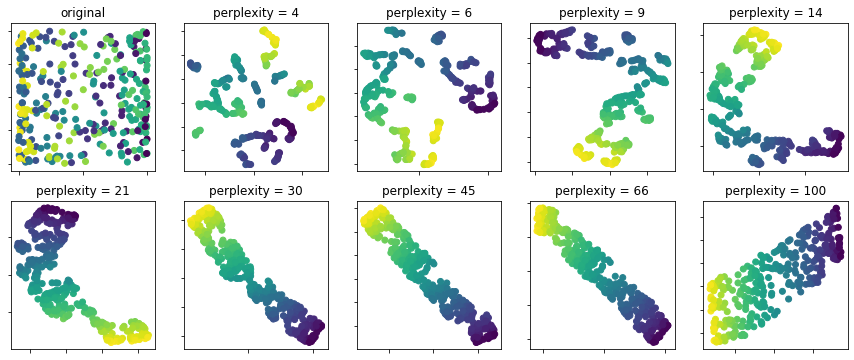

In [4]:
make_s_shaped_plots(X)